In [112]:
import random
import matplotlib.pyplot as plt

In [113]:
AGENT = 1
OPPONENT = -1
NO_PLAYER = 0

In [122]:
# Game Model
class MyGame:
    def __init__(self, game_state=None):
        # Initialize the game state
        if game_state is None:
            game_state = [
                0, 0, 0,
                0, 0, 0,
                0, 0, 0
            ]
        self.state = game_state

    def __str__(self):
        return str(self.state)

    def is_draw(self):
        # Check if the game is a draw
        return len([field for field in self.state if field == NO_PLAYER]) == 0

    def is_finished(self):
        # Check if the game is finished
        return self.get_winner() != NO_PLAYER or self.is_draw()

    def valid_moves(self):
        # Get valid moves in the current state
        return [i for i in range(9) if self.state[i] == NO_PLAYER]

    def make_move(self, field, player):
        # Make a move in the game
        next_state = list(self.state)
        next_state[field] = player
        return MyGame(next_state)

    def get_winner(self):
        # Check and return the winner of the game
        state = self.state
        for i in range(3):
            if state[i * 3] == state[i * 3 + 1] == state[i * 3 + 2] == state[i * 3] != NO_PLAYER:
                return state[i * 3]
            if state[i] == state[i + 3] == state[i + 6] == state[i] != NO_PLAYER:
                return state[i]
            if state[0] == state[4] == state[8] == state[0] != NO_PLAYER:
                return state[0]
            if state[2] == state[4] == state[6] == state[2] != NO_PLAYER:
                return state[2]
        return NO_PLAYER


In [123]:
# Function to play games
def play_games(policy, opponent_policy, num_games=100):
    games_won = 0
    draw = 0
    # Play games
    for i in range(num_games):
        game = MyGame()
        # 50% chance opponent starts
        if random.random() > 0.5:
            game = game.make_move(opponent_policy(game), OPPONENT)

        while not game.is_finished():
            # First player's turn
            game = game.make_move(policy(game), AGENT)
            if game.is_finished():
                break
            # Other player's turn
            game = game.make_move(opponent_policy(game), OPPONENT)

        if game.get_winner() == 0:
            draw = draw + 1
        if game.get_winner() > 0:
            games_won = games_won + 1

    return games_won, draw


In [124]:
# Reward function
def My_reward(game):
    return max(game.get_winner(), 0)


In [125]:
# Policies
class MyValuePolicy:
    DEFAULT_VALUE = 0.5

    def __init__(self):
        self.values = {}

    def policy(self, game):
        # Define the policy for making moves
        move_values = {}
        moves = game.valid_moves()
        for move in moves:
            next_state = game.make_move(move, AGENT)
            move_values[move] = self.get_state_value(next_state)

        return max(move_values, key=move_values.get)

    def get_state_value(self, state):
        # Get the value of a given state
        if str(state) not in self.values:
            return self.DEFAULT_VALUE

        return self.values[str(state)]

    def set_state_value(self, state, value):
        # Set the value of a given state
        self.values[str(state)] = value

    def learn(self, states):
        # Perform the learning using temporal difference
        def temporal_difference(current_state_value, next_state_value):
            learning_rate = 0.1
            return current_state_value + learning_rate * (next_state_value - current_state_value)

        last_state = states[-1:][0]
        last_value = My_reward(last_state)
        self.set_state_value(last_state, last_value)
        # Go through every state from end to start
        for state in reversed(states[:-1]):
            value = self.get_state_value(state)
            last_value = temporal_difference(value, last_value)
            self.set_state_value(state, last_value)


In [126]:
# Random policy
def My_random_policy(game):
    return random.choice(game.valid_moves())

In [127]:
# Training function
def My_train(policy, opponent_policy, training_games=1000):
    wins = []
    draws = []

    for i in range(training_games):
        game = MyGame()
        states = []

        # 50% chance opponent starts
        if random.random() > 0.5:
            game = game.make_move(opponent_policy(game), OPPONENT)

        while not game.is_finished():
            # Agent makes a move, occasionally making a random choice
            if random.random() < 0.5:
                game = game.make_move(My_random_policy(game), AGENT)
            else:
                game = game.make_move(policy.policy(game), AGENT)
            states.append(game)

            if game.is_finished():
                break

            game = game.make_move(opponent_policy(game), OPPONENT)
            states.append(game)

        policy.learn(states)

        # Track wins and draws for each iteration
        games_won, draw = play_games(My_policy.policy, My_random_policy, 100)
        wins.append(games_won)
        draws.append(draw)

    # Plot the results
    plot_training_results(wins, draws, training_games)


In [128]:
# Function to plot training results
def plot_training_results(wins, draws, total_games):
    plt.plot(wins, label='Wins')
    plt.plot(draws, label='Draws')
    plt.xlabel('Games played')
    plt.ylabel('Number of games')
    plt.title('Training Results')
    plt.legend()
    plt.show()

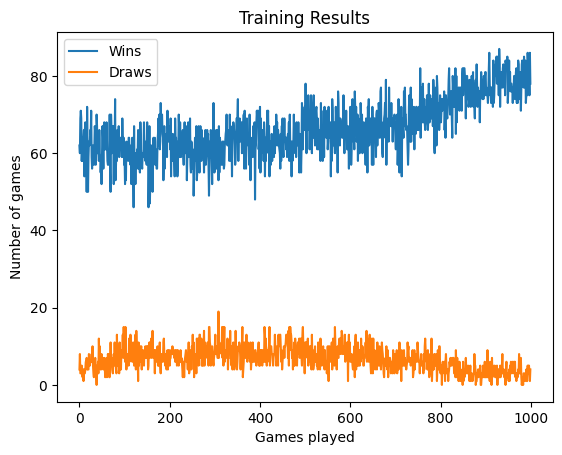

Games played: 1000
Games won: 801
Draw: 42


In [129]:
# Train and run the reinforcement learning
My_policy = MyValuePolicy()

My_train(My_policy, My_random_policy, training_games=1000)

games_to_play = 1000
games_won, draw = play_games(My_policy.policy, My_random_policy, games_to_play)

print("Games played: %s" % games_to_play)
print("Games won: %s" % games_won)
print("Draw: %s" % draw)